## Runge-Kutta和Adams方法求解

### q2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定义参数
r = 3
a = 0.002
b = 0.0006
d = 0.5

In [3]:
# 定义ODE系统
def f(t, u):
    x, y = u
    dxdt = r * x - a * x * y
    dydt = -d * y + b * x * y
    return np.array([dxdt, dydt])

In [4]:
# 四阶Runge-Kutta方法
def rk4(f, t0, u0, t_end, h):
    """ 
    Arguments:
        f -- ode system
        t0 -- initial time
        u0 -- x0, y0
        t_end -- end time
        h -- step size

    Returns:
        list of t values and list of u values
    """    
    t_values = np.arange(t0, t_end + h, h)
    n = len(t_values)
    u_values = np.zeros((n, len(u0)))
    u_values[0] = u0
    
    for i in range(1, n):
        t = t_values[i-1]
        u = u_values[i-1]
        k1 = f(t, u)
        k2 = f(t + h/2, u + h/2 * k1)
        k3 = f(t + h/2, u + h/2 * k2)
        k4 = f(t + h, u + h * k3)
        u_values[i] = u + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return t_values, u_values

In [5]:
# 四阶Adams预测校正方法
def adams_pc(f, t0, u0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    n = len(t_values)
    u_values = np.zeros((n, len(u0)))
    u_values[0] = u0
    
    # 用RK4计算前4个点
    for i in range(1, min(4, n)):
        t = t_values[i-1]
        u = u_values[i-1]
        k1 = f(t, u)
        k2 = f(t + h/2, u + h/2 * k1)
        k3 = f(t + h/2, u + h/2 * k2)
        k4 = f(t + h, u + h * k3)
        u_values[i] = u + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    # Adams预测校正
    for i in range(4, n):
        t = t_values[i-1]
        # 预测
        f_n = f(t_values[i-1], u_values[i-1])
        f_n1 = f(t_values[i-2], u_values[i-2])
        f_n2 = f(t_values[i-3], u_values[i-3])
        f_n3 = f(t_values[i-4], u_values[i-4])
        u_pred = u_values[i-1] + h/24 * (55 * f_n - 59 * f_n1 + 37 * f_n2 - 9 * f_n3)
        
        # 校正
        f_pred = f(t_values[i], u_pred)
        u_values[i] = u_values[i-1] + h/24 * (9 * f_pred + 19 * f_n - 5 * f_n1 + f_n2)
    
    return t_values, u_values

In [6]:
# 初始条件
t0 = 0
u0 = np.array([1000, 500])
t_end = 10
h = 0.01  # 步长

# # 使用RK4求解
# t_rk4, u_rk4 = rk4(f, t0, u0, t_end, h)

# # 打印部分结果验证 f
# print("RK4方法前5个时间点的解：")
# for i in range(min(5, len(t_rk4))):
#     print(f"t = {t_rk4[i]:.2f}, x = {u_rk4[i, 0]:.2f}, y = {u_rk4[i, 1]:.2f}")

In [ ]:
# 使用Adams预测校正求解
t_adams, u_adams = adams_pc(f, t0, u0, t_end, h)

# print("\nAdams方法前5个时间点的解：")
# for i in range(min(5, len(t_adams))):
#     print(f"t = {t_adams[i]:.2f}, x = {u_adams[i, 0]:.2f}, y = {u_adams[i, 1]:.2f}")

In [12]:
print("\nAdams方法10个时间点的解：")
for i in range(0,1100,100):
    print(f"t = {t_adams[i]:.2f}, x = {u_adams[i, 0]:.2f}, y = {u_adams[i, 1]:.2f}")

import pandas as pd

# 保存结果到表格
results = []
for i in range(0, 1100, 100):
    results.append({
        "t": t_adams[i],
        "x": u_adams[i, 0],
        "y": u_adams[i, 1]
    })

# 转换为 DataFrame
df = pd.DataFrame(results)

# 保存为 CSV 文件
df.to_csv("adams_results.csv", index=False, encoding="utf-8-sig")

print("结果已保存到 adams_results.csv 文件中。")
# for i in range(min(5, len(t_adams))):
#     print(f"t = {t_adams[i]:.2f}, x = {u_adams[i, 0]:.2f}, y = {u_adams[i, 1]:.2f}")


Adams方法10个时间点的解：
t = 0.00, x = 1000.00, y = 500.00
t = 1.00, x = 4392.88, y = 1512.23
t = 2.00, x = 288.00, y = 3175.16
t = 3.00, x = 32.21, y = 2042.43
t = 4.00, x = 25.39, y = 1257.67
t = 5.00, x = 69.19, y = 781.57
t = 6.00, x = 388.88, y = 527.49
t = 7.00, x = 2701.28, y = 664.35
t = 8.00, x = 1602.59, y = 3240.39
t = 9.00, x = 68.37, y = 2556.42
t = 10.00, x = 23.41, y = 1584.25
结果已保存到 adams_results.csv 文件中。


### q3 绘图

In [ ]:
# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(t_adams, u_adams[:, 0], label='x(t) (Prey)')
plt.plot(t_adams, u_adams[:, 1], label='y(t) (Predator)')
plt.xlabel('Time t')
plt.ylabel('Population')
plt.title('Predator-Prey Model (adams)')
plt.legend()
plt.grid(True)
plt.show()

##### 相轨线的图

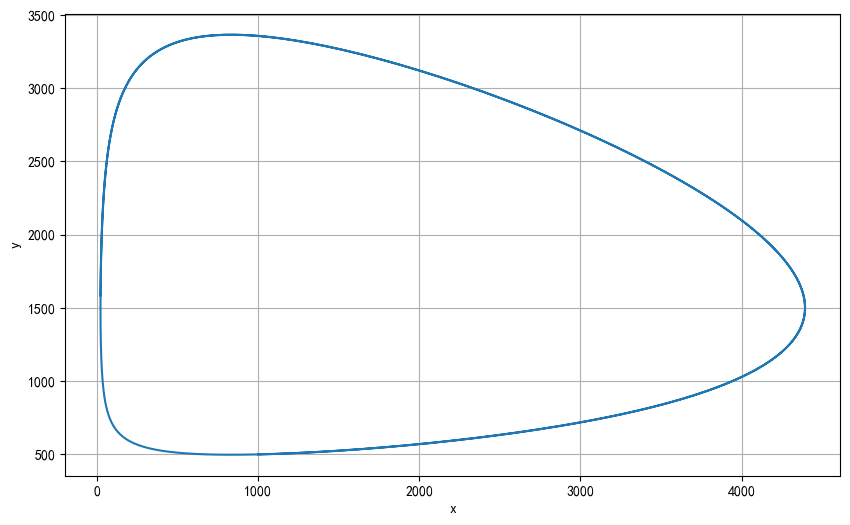

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为支持中文的字体，例如 SimHei（黑体）
rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(u_adams[:, 0], u_adams[:, 1])

plt.xlabel('x')
plt.ylabel('y')
# plt.title('相轨线')  # 中文标题
# plt.legend(['轨迹'])  # 添加图例
plt.grid(True)
plt.show()

### q4

In [ ]:
from scipy.signal import find_peaks

# 找到x(t)的峰值
peaks, _ = find_peaks(u_adams[:, 0], distance=50)  # distance避免检测到噪声峰

# 计算周期
if len(peaks) >= 2:
    period = t_adams[peaks[1]] - t_adams[peaks[0]]
    print(f"估计的周期: {period:.2f}")
else:
    print("峰值不足，无法估计周期")

估计的周期: 6.47


### q5

In [ ]:
start_idx = peaks[0]
end_idx = peaks[1]

t_cycle = t_adams[start_idx:end_idx]
x_cycle = u_adams[start_idx:end_idx, 0]
y_cycle = u_adams[start_idx:end_idx, 1]

# 使用梯形法则计算积分
x_integral = np.trapz(x_cycle, t_cycle)
y_integral = np.trapz(y_cycle, t_cycle)

# 计算平均值
x_avg = x_integral / period
y_avg = y_integral / period

print(f"一个周期内x的平均值: {x_avg:.2f}")
print(f"一个周期内y的平均值: {y_avg:.2f}")

一个周期内x的平均值: 823.65
一个周期内y的平均值: 1497.71


In [22]:
import numpy as np
from scipy.optimize import minimize

# Observational data
t_obs = np.array([0, 1, 2, 3, 4, 5, 6])
x_obs = np.array([1000, 2996, 217, 29, 22, 49, 214])
y_obs = np.array([500, 1737, 3069, 2017, 1266, 800, 537])

In [ ]:
# ODE system
def predator_prey(t, u, r, a, b, d):
    x, y = u
    dxdt = r * x - a * x * y
    dydt = -d * y + b * x * y
    return np.array([dxdt, dydt])

# Adams predictor-corrector method
def adams_pc(f, t0, u0, t_end, h, params):
    r, a, b, d = params
    t_values = np.arange(t0, t_end + h, h)
    n = len(t_values)
    u_values = np.zeros((n, len(u0)))
    u_values[0] = u0
    
    for i in range(1, min(4, n)):
        t = t_values[i-1]
        u = u_values[i-1]
        k1 = f(t, u, r, a, b, d)
        k2 = f(t + h/2, u + h/2 * k1, r, a, b, d)
        k3 = f(t + h/2, u + h/2 * k2, r, a, b, d)
        k4 = f(t + h, u + h * k3, r, a, b, d)
        u_values[i] = u + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    for i in range(4, n):
        t = t_values[i-1]
        f_n = f(t_values[i-1], u_values[i-1], r, a, b, d)
        f_n1 = f(t_values[i-2], u_values[i-2], r, a, b, d)
        f_n2 = f(t_values[i-3], u_values[i-3], r, a, b, d)
        f_n3 = f(t_values[i-4], u_values[i-4], r, a, b, d)
        u_pred = u_values[i-1] + h/24 * (55 * f_n - 59 * f_n1 + 37 * f_n2 - 9 * f_n3)
        f_pred = f(t_values[i], u_pred, r, a, b, d)
        u_values[i] = u_values[i-1] + h/24 * (9 * f_pred + 19 * f_n - 5 * f_n1 + f_n2)
    
    return t_values, u_values

In [35]:
# Solve ODE at observation points
def solve_ode_at_obs(params):
    t0 = 0
    u0 = np.array([1000, 500])
    t_end = 6
    h = 0.01
    t_values, u_values = adams_pc(predator_prey, t0, u0, t_end, h, params)
    indices = (t_obs / h).astype(int)
    return u_values[indices, 0], u_values[indices, 1]

# Error function
def error_function(params):
    x_pred, y_pred = solve_ode_at_obs(params)
    error = np.sum((x_pred - x_obs)**2 + (y_pred - y_obs)**2)
    return error

In [36]:
# Initial guess and optimization
initial_guess = [3, 0.002, 0.0006, 0.5]
result = minimize(error_function, initial_guess, method='Nelder-Mead')

# Results
best_params = result.x
print("最佳参数 r, a, b, d:", best_params)
print("最佳参数 r, a, b, d: [{:.2f}, {:.2f}, {:.2f}, {:.2f}]".format(*best_params))
print("最小误差:", result.fun)

TypeError: adams_pc() takes 5 positional arguments but 6 were given